In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")
using .Src, Plots, Plots.Measures

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


# Identifiability of Point in Parameter Region 4

p4 = [a,m,w0,n0] = [1.5,0.45,0.?,1.95]

In [17]:
# set true model parameters: convergence to plant-free equilibrium
a_true = 1.5 # right of bifurcation point
m_true = 0.45
n0_true = 0.15
w0 = 1.95
M = 100 # number of measurements
noise = 0.1

# create parameter object for trial
hprm = Hyperprm(w0, n0_true, a_true, m_true, M, noise);

## fixed time window, observe from t=0

### infer a, m

In [18]:
# infer a,m parameter
prm_keys = [:a, :m]

# observation time window fixed
t_fixed = true

true

In [19]:
# inverse uq and practica identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed)

(mle = [1.497580812045102, 0.4878856505947609], plot_mles = Plots.Plot{Plots.GRBackend}[Plot{Plots.GRBackend() n=6}, Plot{Plots.GRBackend() n=6}], plot_losses = Plot{Plots.GRBackend() n=3}, cor = [1.0 -0.033661548776765665; -0.03366154877676568 1.0], cov = [0.0010222028504262963 -0.0006999853632811291; -0.0006999853632811294 0.42303143656780906], gaussian_heatmap = Plot{Plots.GRBackend() n=1}, gaussian_surface = Plot{Plots.GRBackend() n=2})

In [20]:
# forward uq
rf = forward_uq(r.mle, r.cov, prm_keys, [a_true, m_true], hprm, t_fixed=t_fixed)

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

### analyse

In [21]:
r.mle

2-element Vector{Float64}:
 1.497580812045102
 0.4878856505947609

In [22]:
r.cov

2×2 Matrix{Float64}:
  0.0010222    -0.000699985
 -0.000699985   0.423031

we note that the variance of m is very high compared to the scale of the mean value, so we will likely run into problems. m can even become negative, for which our model is not defined. Further, m could become greater than two, for which the model exhibits a completely different bifurcation behaviour (stable branch becomes unstable as well).

In [23]:
r.cor

2×2 Matrix{Float64}:
  1.0        -0.0336615
 -0.0336615   1.0

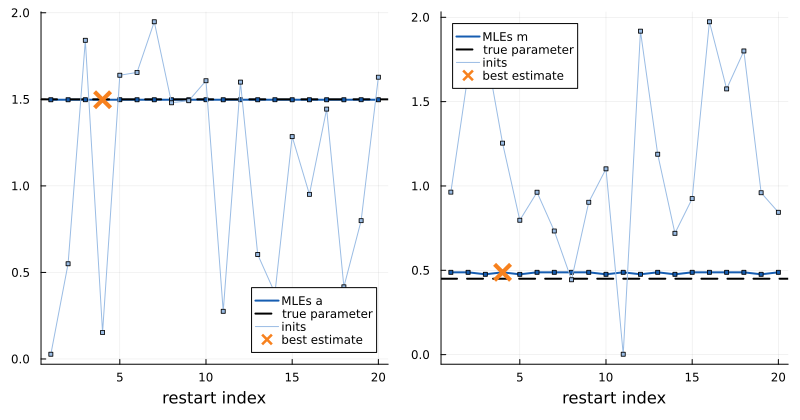

In [24]:
plot(r.plot_mles[1], r.plot_mles[2], layout=(1,2), size=(800,420), bottom_margin=5mm)

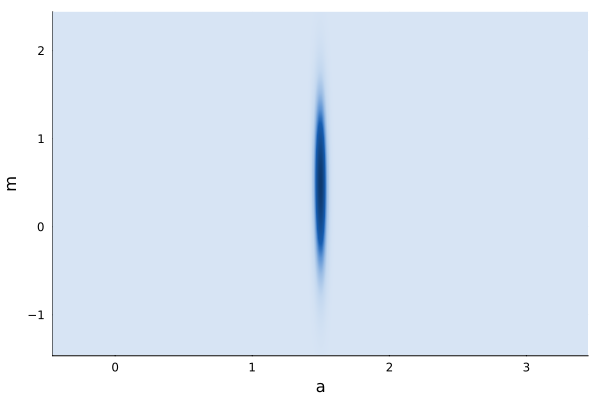

In [25]:
r.gaussian_heatmap

the covariates are barely correlated, which is seen in the Gaussian plot. However, we see that the variance of m is very high.

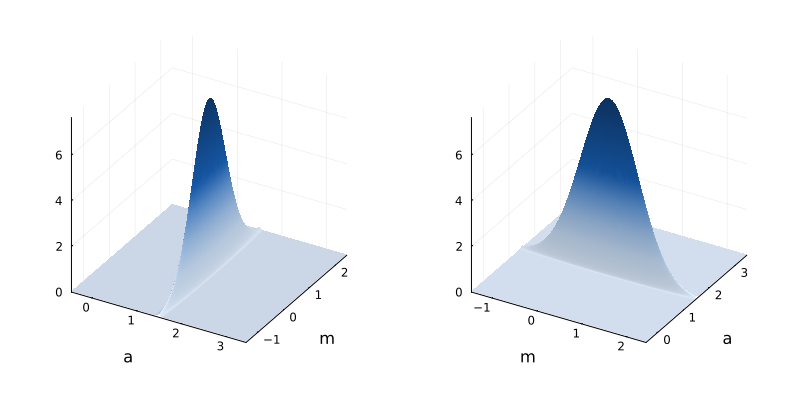

In [26]:
r.gaussian_surface

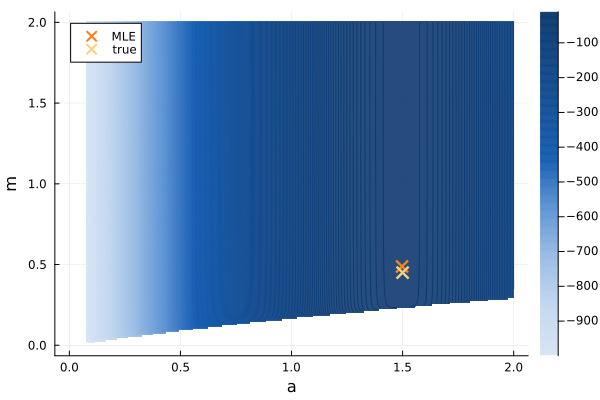

In [27]:
analyze_ll(r.mle,prm_keys, hprm,-1000, t_fixed=t_fixed)
scatter!([a_true],[m_true], markershape=:x, markerstrokewidth=3, markersize=6, color="#FAD080", label="true")

the likelihood surface shows no unique optimum, it seems more like the level sets are flatly stretched into m direction. Thus, the MLE is not correctly found.

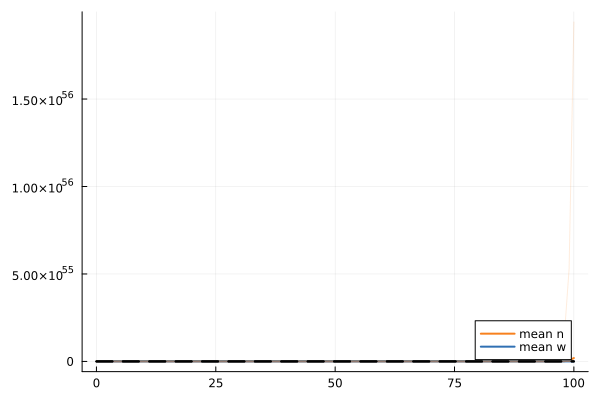

In [28]:
rf.trajectories

We see that some of the trajectories of the n-compartment blow up! The simulated behaviour does not at all depict the true behaviour of the system, as we expect convergence to the plant free equilibrium, i.e. convergence of n towards zero.

As suspected before, the high variance of m causes spurious behaviour. Suppose that we sample m=0.2, a=a_mle.


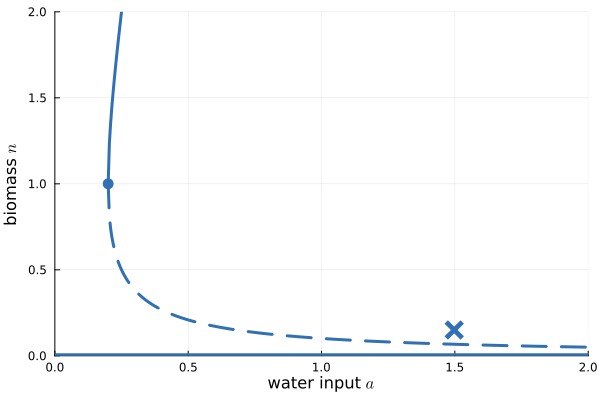

In [32]:
m = 0.1
bif_plot(m,"n", points=[[r.mle[1],n0_true]])

We see that in this exemplary case the bifurcation branch is passed, such that the system exhibits a different convergence behaviour. This explains why many Monte-Carlo samples converge to the wrong n-value.

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lisah\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lisah\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lisah\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lisah\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lisah\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lisah\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lisah\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194


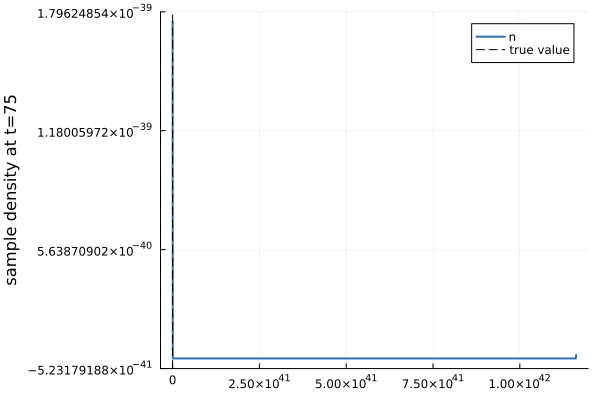

In [30]:
rf.sample_dens_n

most samples concentrate around zero, but some blow up (indicated by large scale).

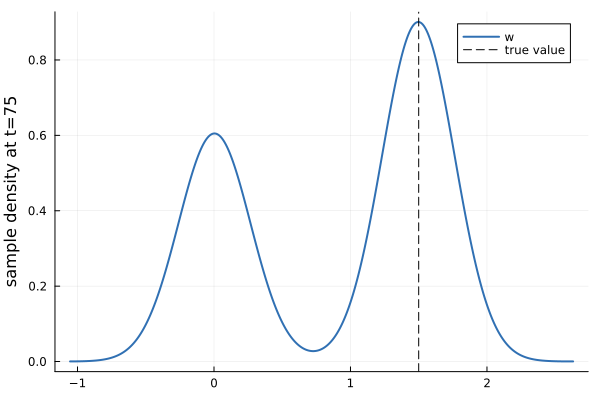

In [31]:
rf.sample_dens_w

Somehow the sample density of w also is bimodal, with a stable state value concentrating around zero. Hence, in some cases the w-compartment converges to a negative value.

We see that the high variance in one parameter causes the whole model behaviour to become highly unstable and the bifurcation anf convergenve behaviour is very different than expected for the true model parameters.

#### try no noise

In [33]:
# set true model parameters: convergence to plant-free equilibrium
a_true = 1.5 # right of bifurcation point
m_true = 0.45
n0_true = 0.2
w0 = 1.95
M = 100 # number of measurements
noise = 0.0

# create parameter object for trial
hprm = Hyperprm(w0, n0_true, a_true, m_true, M, noise);

In [34]:
# inverse uq and practica identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed)

(mle = [1.500000234901091, 0.45001004623215113], plot_mles = Plots.Plot{Plots.GRBackend}[Plot{Plots.GRBackend() n=6}, Plot{Plots.GRBackend() n=6}], plot_losses = Plot{Plots.GRBackend() n=3}, cor = [1.0 -0.05218059695684187; -0.05218059695684187 1.0], cov = [0.010256664475881137 -0.0046518946293814135; -0.0046518946293814135 0.7748818751075025], gaussian_heatmap = Plot{Plots.GRBackend() n=1}, gaussian_surface = Plot{Plots.GRBackend() n=2})

In [35]:
r.mle

2-element Vector{Float64}:
 1.500000234901091
 0.45001004623215113

In [36]:
r.cov

2×2 Matrix{Float64}:
  0.0102567   -0.00465189
 -0.00465189   0.774882

still, the variance of m is very high, so a noise reduction does not improve the estimation results.

Conclusion: a,m not inferable (independently of noise)

### infer only a

In [10]:
prm_keys = [:a]

1-element Vector{Symbol}:
 :a

In [11]:
# set true model parameters: convergence to plant-free equilibrium
a_true = 1.5 # right of bifurcation point
m_true = 0.45
n0_true = 0.2
w0 = 1.95
M = 100 # number of measurements
noise = 0.1

# create parameter object for trial
hprm = Hyperprm(w0, n0_true, a_true, m_true, M, noise);

In [12]:
# inverse uq and practica identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed)

(mle = [1.5057102413383714], plot_mles = Plot{Plots.GRBackend() n=6}, plot_losses = Plot{Plots.GRBackend() n=3}, cor = [1.0;;], cov = [0.0010229769752145067;;], gaussian_heatmap = nothing, gaussian_surface = Plot{Plots.GRBackend() n=1})

In [13]:
# forward uq
rf = forward_uq(r.mle, r.cov, prm_keys, [a_true, m_true], hprm, t_fixed=t_fixed)

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

In [15]:
r.cov

1×1 Matrix{Float64}:
 0.0010229769752145067

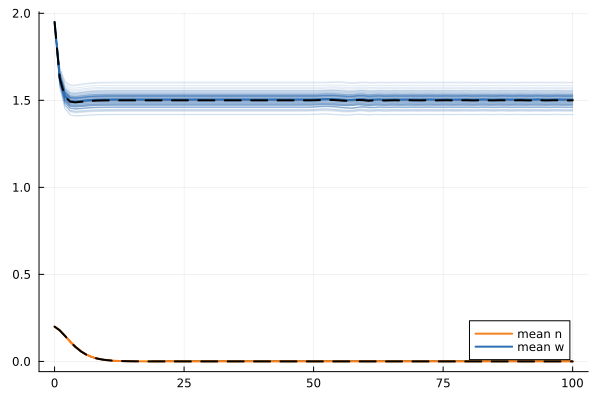

In [14]:
rf.trajectories